In [1]:
from fastjet import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def print_jets(jets):
    print("{0:>5s} {1:>10s} {2:>10s} {3:>10s}".format("jet #", "pt", "eta", "phi_std"))
    for ijet in range(len(jets)):
        print("{0:5d} {1:10.3f} {2:10.4f} {3:10.4f}".format(
            ijet, jets[ijet].pt(), jets[ijet].eta(), jets[ijet].phi_std()))

In [24]:
def get_labelled_grid(jets):
    jetgrid = np.zeros((data.shape[1], data.shape[2]))
    
    ijet = 1
    for jet in jets:
        for pix in jet.constituents():
            x = np.int((pix.eta() + 3.1) * 10)
            y = np.int((pix.phi_std() + 3.1) * 10)
            jetgrid[y, x] = ijet
            
        ijet += 1
    
    return jetgrid

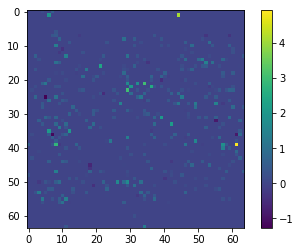

In [4]:
data = np.load("/Users/justinchen/Documents/Stanford1718/winter/cs230/data_small3/pixel_image_pt.npy")
plt.imshow(data[0])
plt.colorbar()
plt.show()

In [5]:
# Transformation of coordinates
m = data.shape[0]
n_pixels = data.shape[1] * data.shape[2]
data_transform = np.ndarray(shape=(m, data.shape[1], data.shape[2], 4))

phi = np.arange(-3.2, 3.2, 0.1).reshape(data.shape[1], 1)
eta = np.arange(-3.2, 3.2, 0.1).reshape(1, data.shape[2])

px = data * np.cos(phi)
py = data * np.sin(phi)
pz = data * np.sinh(eta)
E = data * np.cosh(eta)

data_transform[:, :, :, 0] = px
data_transform[:, :, :, 1] = py
data_transform[:, :, :, 2] = pz
data_transform[:, :, :, 3] = E

data_transform = data_transform.reshape(m, n_pixels, 4)

In [6]:
particles = []
for i in range(m):
    if i % 200 == 0:
        print(i)
    event_particles = []
    for j in range(n_pixels):
        event_particles.append(PseudoJet(data_transform[i, j, 0], data_transform[i, j, 1], data_transform[i, j, 2], data_transform[i, j, 3]))
    
    particles.append(event_particles)

0
200
400
600
800


In [20]:
bin_grids = np.ndarray(shape = (m, data.shape[1], data.shape[2]))

In [26]:
jet_def = JetDefinition(antikt_algorithm, 0.4)
selector = SelectorPtMin(10)
for i in range(m):
    if i % 5 == 0:
        print(i)
    
    np.save("/Users/justinchen/Documents/Stanford1718/winter/cs230/labels_10pt.npy", bin_grids)
    jets = selector(jet_def(particles[i]))
    bin_grid = get_labelled_grid(jets) #jet pixels = 1, background pixels = 0
    bin_grids[i, :, :] = bin_grid

0
5
10
15
20
25
30
35
40
45
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995


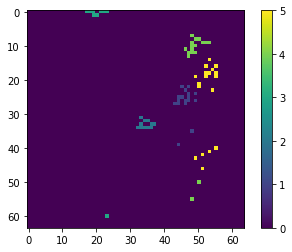

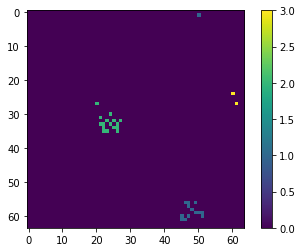

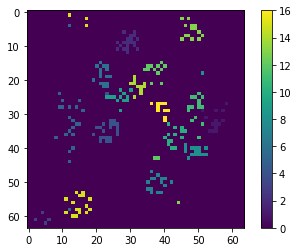

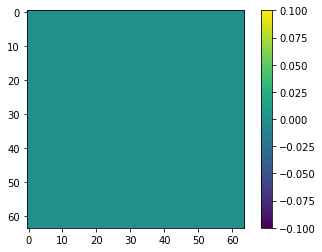

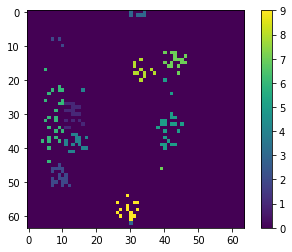

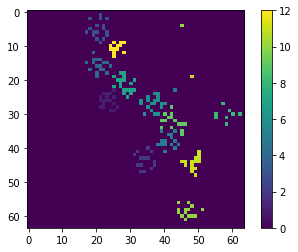

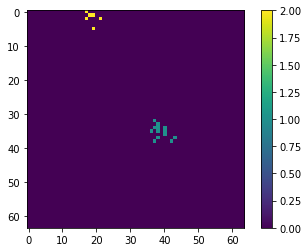

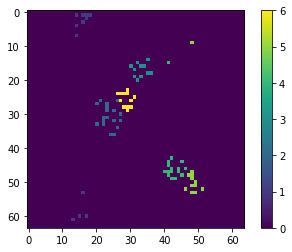

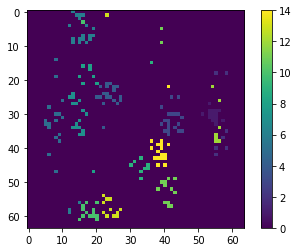

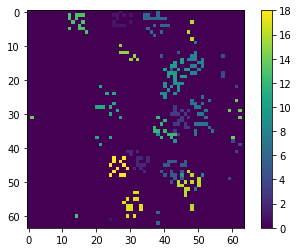

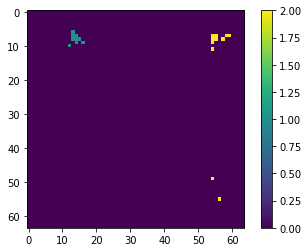

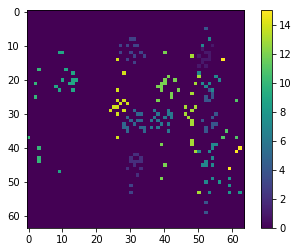

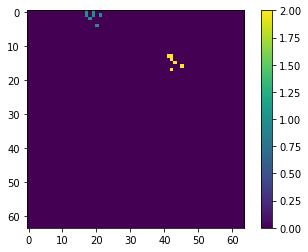

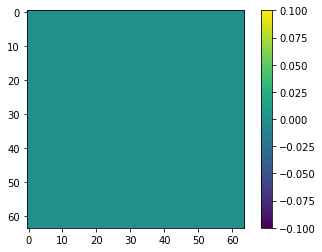

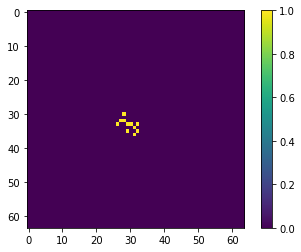

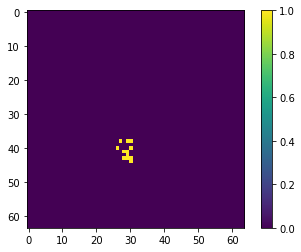

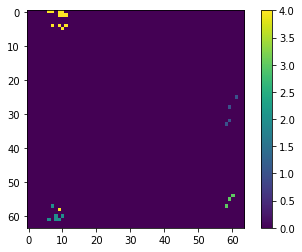

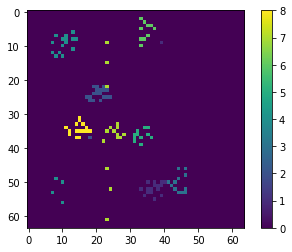

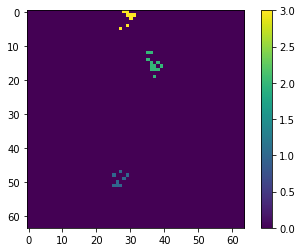

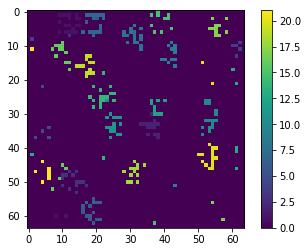

In [28]:
for i in range(920,940):
    plt.figure()
    plt.imshow(bin_grids[i])
    plt.colorbar()
    
plt.show()

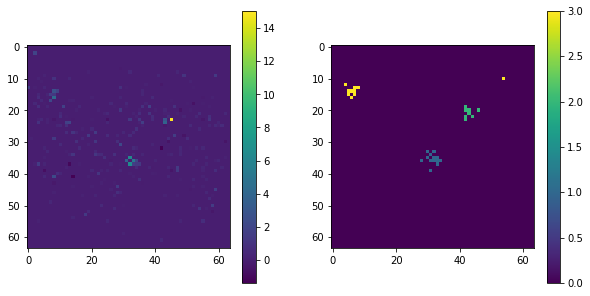

In [58]:
i = 901

f = plt.figure()
f.set_figheight(5)
f.set_figwidth(10)
plt.subplot(121)
plt.imshow(data[i])
plt.colorbar()
plt.subplot(122)
plt.imshow(bin_grids[i])
plt.colorbar()
#plt.savefig('label_example')
plt.show()